# FM python普通版

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_wine
data = load_iris()["data"]
label = load_iris()["target"]
td = data[label !=2]
la = label[label !=2]
mean_td = np.mean(td, axis=0)
new_td = td - mean_td


ntd = []
for line in new_td:
    temp = [1 if i>0 else 0 for i in line]
    ntd.append(temp)

    
def sigm(x):
    return 1.0 / (1.0 + np.exp(-x))

In [4]:
la = np.array([-1 if i<1 else 1 for i in la])
def update_w_matrix(data, k=2, maxiter=100, label=la, alpha=0.01):
    if isinstance(data, list):
        data = np.array(data)
    elif not isinstance(data, np.ndarray):
        raise TypeError("data type must be np.ndarray")
    else:
        pass
    m, n = data.shape
    w0 = 0
    w1 = np.random.randn(n, 1)
    v = np.random.randn(n, k)
    iters = 0
    label = label.reshape(m, 1)
    while iters < maxiter:
        iters += 1
        
        inter1 = np.matmul(data, v)
        # print("inter1 shape : {}".format(inter1.shape)) 100*2
        
        inter2 = np.matmul(np.power(data, 2), np.power(v, 2))
        # print("inter2 shape : {}".format(inter2.shape))
        
        temp = np.sum(np.power(inter1, 2) - inter2, axis=1, keepdims=True)
        prob = w0 + np.matmul(data, w1) + 0.5 * temp
        
        cost = 0.0
        for i in range(m):
            cost += -np.log(sigm(prob[i] * label[i]))
        # print("cost is {}".format(cost / m))
        # print("prob shape : {}".format(prob.shape))
        # loss = -np.sum(np.log(sigm(np.multiply(prob, label))))
        loss = sigm(np.multiply(prob, label.reshape(m, 1)))
        # print("loss shape : {}".format(loss.shape))
        error = np.multiply(1 - sigm(np.multiply(prob, label)), label)
        # m * 1 print(error.shape)
        w0 = w0 - (1 / m) * alpha * np.matmul(np.ones((m, 1)).T, error)
        # print("w0 shape : {}".format(w0.shape))
        w1 = w1 - (1 / m) * alpha * np.matmul(data.T, error)
        # print("w1 shape : {}".format(w1.shape))
        
        cost1 = np.multiply(np.matmul(np.multiply(data, data).T, error), v)
        # cost1 = np.matmul(np.multiply(data, data), v)
        # print(cost1.shape)
        
        cost2 = np.matmul(data.T, np.matmul(data, v) * error)
        # n * 1 
        temp = cost2 - cost1
        
        # temp = np.matmul(data.T, np.matmul(data, v)) - np.matmul(np.multiply(data, data), v)
        # temp = np.sum(np.matmul(data, v), axis=0) - np.matmul(data, v) 
        # print("temp shape : {}".format(temp.shape))
        
        # print("temp is {}".format(temp.shape))
        v =  v - (1 / m) * alpha * temp
        # n* 1, n* k
        
        # print("v shape {} ".format(v.shape))
    return w0, w1, v


def get_predict(traindata, testdata, maxiter=100, la=la):
    w0, w1, v = update_w_matrix(traindata, maxiter=100)
    int1 = np.matmul(testdata, v)
    int2 = np.matmul(np.multiply(testdata, testdata), np.multiply(v, v))
    pred = (w0 + np.matmul(traindata, w1) + 0.5 * np.sum((np.power(int1, 2) -int2), axis=1, keepdims=True))
    # print(pred.shape)
    pred = [1 if i>=0 else -1 for i in pred]
    return np.sum(pred==la)

get_predict(ntd, ntd, maxiter=1000)

45

In [5]:
def update_wss(datas, k=2, maxiter=100, label=la, alpha=0.01):
    m, n = datas.shape
    w0 = 0
    w1 = np.random.randn(n, 1)
    v = np.random.randn(n, k)
    iters = 0
    while iters < maxiter:
        iters += 1
        for i in range(m):
            data = np.mat(datas[i])
            inter1 = np.power(np.matmul(data, v), 2) # 1 * k
            inter2 = np.matmul(np.power(data, 2), np.power(v, 2)) # 1* k
            prob = w0 + np.matmul(data, w1) + 0.5 * np.sum(inter1 - inter2, axis=1)
            # loss = -np.sum(np.log(sigm(np.multiply(prob, label))))
            error = (1 - sigm(prob * label[i])) * label[i]
            w0 = w0 - alpha * error
            w1 = w1 - alpha * data.T * error
            temp = np.matmul(data.T, np.matmul(data, v)) - np.matmul(np.multiply(data, data), v)
            # temp = np.matmul(data.T, np.matmul(data, v)) - np.matmul(np.matmul(data.T, data), v)
            v =  v - alpha * np.multiply(temp, error)
    return w0, w1, v


w0, w1, v = update_wss(td, maxiter=10)
int1 = np.power(np.matmul(td, v), 2)
int2 = np.matmul(np.multiply(td, td), np.multiply(v, v))
# multiply 类似于平方了
pred = sigm(w0 + np.matmul(td, w1) + 0.5 * np.sum(int1 -int2, axis=1))
pred = [1 if i >0.5 else -1 for i in pred]
np.sum(pred==la)

/Users/luokui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


100

## Keras 实现Neural H-FM

In [11]:
from keras.layers import Dense, Input, Embedding,Activation, Dropout, regularizers
from keras import  Sequential
import keras.backend as K
import keras
from keras.models import Model

In [12]:
# txs = np.array(ntd)

In [ ]:
tx = np.zeros_like(txs)
m = len(ntd)
k = 0
for i in range(4):
    for j in range(m):
        if txs[j,i]==0:
            tx[j,i]=k
        else:
            tx[j,i]=k+1
    k +=2
tx[:2]

y = label[label !=2]
y[:2]
tx[:2]

In [79]:
y = y.reshape(-1,1)

In [113]:
n_feature = 4
out_feature = 2
vocab = 8
wx_feature = 1

In [121]:
inputs = Input(shape=(n_feature,))
embed_1 = Embedding(input_dim=vocab, output_dim=out_feature, input_length=n_feature)(inputs)
embed_2 = Embedding(input_dim=vocab, output_dim=wx_feature, input_length=n_feature)(inputs)

In [130]:
from keras.layers import Lambda
def get_intsect(x):
    inter1 = K.pow(K.sum(x, axis=1), 2)
    inter2 = K.sum(K.pow(x, 2), axis=1)
    inters = 0.5 * (inter1 - inter2)
    bilinear = K.sum(inters, axis=-1, keepdims=True)
    # 这种地方需要特别注意
    bilinears = Dropout(0.2)(bilinear)
    # 加入dropout.
    return bilinears

def get_wx(x):
    wx = K.sum(x, axis=1)
    return wx


# 自定义损失函数的
def loss_function(y, y_pred):
    error = y * y_pred
    resu = 1 / (1 + K.exp(-error))
    return K.mean(resu, axis=-1)

def bcs(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)

In [139]:
#init_bias = K.constant(value=0.01)
bis = Lambda(get_intsect)(embed_1)
wxs = Lambda(get_wx)(embed_2)
bis_w = keras.layers.Add()([bis, wxs])
output =Dense(1, activation="sigmoid")(bis_w)
model = Model(inputs, output)

In [140]:
#model.compile(loss=loss_function, optimizer="sgd", metrics=["acc"])
model.compile(loss=bcs, optimizer="adam", metrics=["acc"])
model.fit(tx, y, epochs=20, batch_size=10)
model.summary()

Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5219 - acc: 1.0000
Epoch 2/20
100/100 [==============================] - 0s 216us/step - loss: 0.5069 - acc: 1.0000
Epoch 3/20
100/100 [==============================] - 0s 211us/step - loss: 0.4909 - acc: 1.0000
Epoch 4/20
100/100 [==============================] - 0s 208us/step - loss: 0.4747 - acc: 1.0000
Epoch 5/20
100/100 [==============================] - 0s 215us/step - loss: 0.4650 - acc: 1.0000
Epoch 6/20
100/100 [==============================] - 0s 198us/step - loss: 0.4488 - acc: 1.0000
Epoch 7/20
100/100 [==============================] - 0s 264us/step - loss: 0.4289 - acc: 1.0000
Epoch 8/20
100/100 [==============================] - 0s 277us/step - loss: 0.4151 - acc: 1.0000
Epoch 9/20
100/100 [==============================] - 0s 232us/step - loss: 0.4072 - acc: 1.0000
Epoch 10/20
100/100 [==============================] - 0s 242us/step - loss: 0.3855 - acc: 1.0000
Epoch 11/20
100/100 [==========

In [141]:
pred = model.predict(tx)
pr = [ [1] if i>=0.5 else [0] for i in pred]
np.sum(pr==y)

100

# NFM 在Frappe 上的测试

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

class LoadData(object):
    # Three files are needed in the path
    def __init__(self, path, dataset, loss_type):
        self.path = path + dataset + "/"
        self.trainfile = self.path + dataset +".train.libfm"
        self.testfile = self.path + dataset + ".test.libfm"
        self.validationfile = self.path + dataset + ".validation.libfm"
        self.features_M = self.map_features( )
        self.Train_data, self.Validation_data, self.Test_data = self.construct_data( loss_type )

    def map_features(self): # map the feature entries in all files, kept in self.features dictionary
        self.features = {}
        self.read_features(self.trainfile)
        self.read_features(self.testfile)
        self.read_features(self.validationfile)
        #print("features_M:", len(self.features))
        return  len(self.features)

    def read_features(self, file): # read a feature file
        f = open( file )
        line = f.readline()
        i = len(self.features)
        while line:
            items = line.strip().split(' ')
            for item in items[1:]:
                if item not in self.features:
                    self.features[ item ] = i
                    i = i + 1
            line = f.readline()
        f.close()

    def construct_data(self, loss_type):
        X_, Y_ , Y_for_logloss= self.read_data(self.trainfile)
        if loss_type == 'log_loss':
            Train_data = self.construct_dataset(X_, Y_for_logloss)
        else:
            Train_data = self.construct_dataset(X_, Y_)
        print("# of training:" , len(Y_))

        X_, Y_ , Y_for_logloss= self.read_data(self.validationfile)
        if loss_type == 'log_loss':
            Validation_data = self.construct_dataset(X_, Y_for_logloss)
        else:
            Validation_data = self.construct_dataset(X_, Y_)
        print("# of validation:", len(Y_))

        X_, Y_ , Y_for_logloss = self.read_data(self.testfile)
        if loss_type == 'log_loss':
            Test_data = self.construct_dataset(X_, Y_for_logloss)
        else:
            Test_data = self.construct_dataset(X_, Y_)
        print("# of test:", len(Y_))

        return Train_data,  Validation_data,  Test_data

    def read_data(self, file):
        # read a data file. For a row, the first column goes into Y_;
        # the other columns become a row in X_ and entries are maped to indexs in self.features
        f = open( file )
        X_ = []
        Y_ = []
        Y_for_logloss = []
        line = f.readline()
        while line:
            items = line.strip().split(' ')
            Y_.append( 1.0*float(items[0]) )

            if float(items[0]) > 0:# > 0 as 1; others as 0
                v = 1.0
            else:
                v = 0.0
            Y_for_logloss.append( v )

            X_.append( [ self.features[item] for item in items[1:]] )
            line = f.readline()
        f.close()
        return X_, Y_, Y_for_logloss

    def construct_dataset(self, X_, Y_):
        Data_Dic = {}
        X_lens = [ len(line) for line in X_]
        indexs = np.argsort(X_lens)
        Data_Dic['Y'] = [ Y_[i] for i in indexs]
        Data_Dic['X'] = [ X_[i] for i in indexs]
        return Data_Dic
    
    def truncate_features(self):
        """
        Make sure each feature vector is of the same length
        """
        num_variable = len(self.Train_data['X'][0])
        for i in xrange(len(self.Train_data['X'])):
            num_variable = min([num_variable, len(self.Train_data['X'][i])])
        # truncate train, validation and test
        for i in xrange(len(self.Train_data['X'])):
            self.Train_data['X'][i] = self.Train_data['X'][i][0:num_variable]
        for i in xrange(len(self.Validation_data['X'])):
            self.Validation_data['X'][i] = self.Validation_data['X'][i][0:num_variable]
        for i in xrange(len(self.Test_data['X'])):
            self.Test_data['X'][i] = self.Test_data['X'][i][0:num_variable]
        return num_variable

In [14]:
paths = "/Users/luokui/Documents/FM/neural_factorization_machine-master/data/"
data = LoadData(paths, "frappe", loss_type="log_loss")
train_data = data.Train_data
v_data = data.Validation_data
test_data = data.Test_data

# of training: 202027
# of validation: 57722
# of test: 28860


In [43]:
n_feature = 10
out_feature = 64
vocab = data.features_M
wx_feature = 1
epoch = 10
batch_size = 128

inputs = Input(shape=(n_feature,))
embed_1 = Embedding(input_dim=vocab, output_dim=out_feature, input_length=n_feature)(inputs)
embed_2 = Embedding(input_dim=vocab, output_dim=wx_feature, input_length=n_feature)(inputs)

In [59]:
# 含DNN版
from keras.layers import Lambda
def get_intsect_dnn(x):
    inter1 = K.pow(K.sum(x, axis=1), 2)
    inter2 = K.sum(K.pow(x, 2), axis=1)
    inters = 0.5 * (inter1 - inter2)
    #bilinear = K.sum(inters, axis=-1, keepdims=True)
    # 这种地方需要特别注意
    bi = Dropout(0.2)(inters)
    bi_1 = Dense(64, activation="tanh")(bi)
    bi_2 = Dropout(0.2)(bi_1)
    bi_3 = Dense(64, activation="tanh")(bi_2)
    bi_4 = Dropout(0.2)(bi_3)
    bilinear = K.sum(bi_4, axis=-1, keepdims=True)
    # 加入dropout.
    return bilinear

def get_wx(x, keepdims=False):
    wx = K.sum(x, axis=1, keepdims=keepdims)
    return wx

# 自定义损失函数的
def loss_function(y, y_pred):
    error = y * y_pred
    resu = 1 / (1 + K.exp(-error))
    return K.mean(resu, axis=-1)

def bcs(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)


bis = Lambda(get_intsect_dnn)(embed_1)

"""
print(bis.shape)
bis_1 = Dense(128, activation="relu")(bis)
print(bis_1.shape)
bis_2 = Dropout(0.2)(bis_1)
print(bis_2)
bis_3 = get_wx(bis_2, keepdims=True)
print(bis_3.shape)
"""

wxs = Lambda(get_wx)(embed_2)
bis_w = keras.layers.Add()([bis, wxs])
output =Dense(1, activation="sigmoid", name="features")(bis_w)
model_new = Model(inputs, output)

model.summary()
# model.add_loss(regularizers.l1_l2()(0.01))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10, 64)       344448      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 10, 1)        5382        input_1[0][0]                    
__________________________________________________________________________________________________
lambda_21 (Lambda)              (None, 1)            0           embedding_1[0][0]                
__________________________________________________________________________________________________
lambda_22 

In [16]:
# 不含DNN版
from keras.layers import Lambda
def get_intsect(x):
    inter1 = K.pow(K.sum(x, axis=1), 2)
    inter2 = K.sum(K.pow(x, 2), axis=1)
    inters = 0.5 * (inter1 - inter2)
    bilinear = K.sum(inters, axis=-1, keepdims=True)
    # 这种地方需要特别注意
    bilinears = Dropout(0.2)(bilinear)
    # 加入dropout.
    return bilinears

def get_wx(x):
    wx = K.sum(x, axis=1)
    return wx

# 自定义损失函数的
def loss_function(y, y_pred):
    error = y * y_pred
    resu = 1 / (1 + K.exp(-error))
    return K.mean(resu, axis=-1)

def bcs(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)

#init_bias = K.constant(value=0.01)
bis = Lambda(get_intsect)(embed_1)
wxs = Lambda(get_wx)(embed_2)
bis_w = keras.layers.Add()([bis, wxs])
output =Dense(1, activation="sigmoid", name="features")(bis_w)
model = Model(inputs, output)

# model.add_loss(regularizers.l1_l2()(0.01))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [60]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, RemoteMonitor, TensorBoard, CSVLogger

savebestmodel = 'keras_NFM.h5'
checkpoint = ModelCheckpoint(savebestmodel, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

log_dir = "./logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
# with open(os.path.join(log_dir, "metadata.tsv"), "w") as f:
 #   np.savetxt(f, np.array(v_data['Y']))

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=0, verbose=0,
                                           mode='auto', baseline=None)
# RM = keras.callbacks.RemoteMonitor(root='http://localhost:9000', path='./', field='data', headers=None, send_as_json=False)
#tf_board = keras.callbacks.TensorBoard(log_dir='./logs',embeddings_layer_names=["features"], embeddings_metadata="metadata.tsv",embeddings_data=np.array(v_data['X']), embeddings_freq = 1, batch_size=batch_size)
tf_board = TensorBoard(log_dir='./logs')
csv_log = keras.callbacks.CSVLogger("./csvlog.csv", separator=',', append=True)
callbacks=[checkpoint, csv_log, early_stop, tf_board] 

In [54]:
# from keras.models import  load_model
new_model = load_model("keras_fm.h5")
score, acc = new_model.evaluate(np.array(test_data['X']), np.array(test_data['Y']), batch_size=batch_size)
print(score, acc)
# 0.2862670608861365 0.957726957735219
# 0.24778012931966484 0.9573111573194185

28860/28860 [==============================] - 0s 17us/step
0.24778012931966484 0.9573111573194185


In [62]:
# new_model.add_loss(regularizers.l1_l2()(0.01))
model.evaluate(np.array(test_data['X']), np.array(test_data['Y']), batch_size=batch_size)

28860/28860 [==============================] - 0s 13us/step


[0.31551130658127907, 0.9556826056908669]

Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 10s 48us/step - loss: 0.0530 - acc: 0.9783 - val_loss: 0.2871 - val_acc: 0.9577

Epoch 00001: val_acc improved from -inf to 0.95773, saving model to keras_NFM.h5
Epoch 2/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0522 - acc: 0.9787 - val_loss: 0.2880 - val_acc: 0.9581

Epoch 00002: val_acc improved from 0.95773 to 0.95807, saving model to keras_NFM.h5


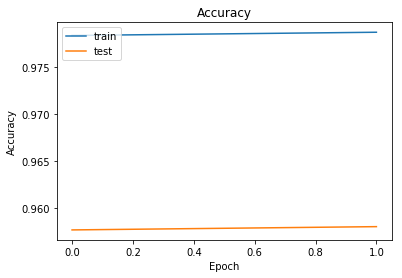

28860/28860 [==============================] - 0s 10us/step
0.3023650134696121 0.9571032571115183
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0530 - acc: 0.9782 - val_loss: 0.2915 - val_acc: 0.9575

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0528 - acc: 0.9786 - val_loss: 0.2960 - val_acc: 0.9577

Epoch 00002: val_acc did not improve from 0.95807


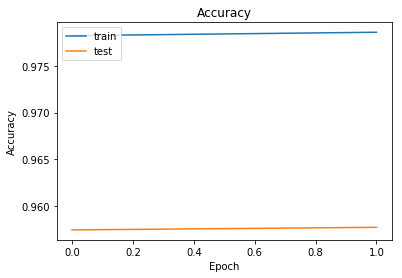

28860/28860 [==============================] - 0s 9us/step
0.31048814622338083 0.9569993070075682
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 11s 53us/step - loss: 0.0530 - acc: 0.9785 - val_loss: 0.2906 - val_acc: 0.9577

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 10s 50us/step - loss: 0.0530 - acc: 0.9783 - val_loss: 0.2907 - val_acc: 0.9578

Epoch 00002: val_acc did not improve from 0.95807


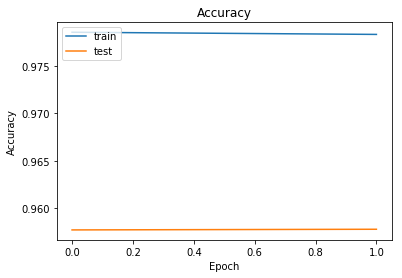

28860/28860 [==============================] - 0s 10us/step
0.30512096490285007 0.9566528066610679
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 11s 54us/step - loss: 0.0531 - acc: 0.9783 - val_loss: 0.2970 - val_acc: 0.9575

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0520 - acc: 0.9786 - val_loss: 0.2980 - val_acc: 0.9575

Epoch 00002: val_acc did not improve from 0.95807


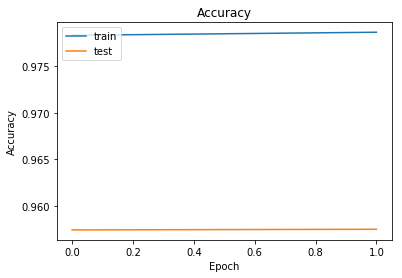

28860/28860 [==============================] - 0s 10us/step
0.31194260413148545 0.9571032571115183
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0534 - acc: 0.9784 - val_loss: 0.2950 - val_acc: 0.9575

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0530 - acc: 0.9784 - val_loss: 0.2963 - val_acc: 0.9576

Epoch 00002: val_acc did not improve from 0.95807


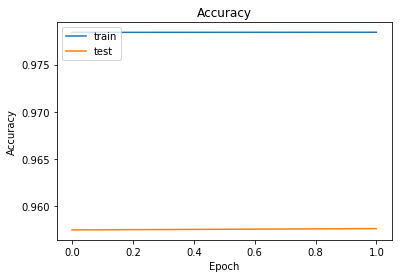

28860/28860 [==============================] - 0s 10us/step
0.310016911488726 0.9566528066610679
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 9s 45us/step - loss: 0.0541 - acc: 0.9781 - val_loss: 0.2976 - val_acc: 0.9571

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 10s 49us/step - loss: 0.0539 - acc: 0.9780 - val_loss: 0.2989 - val_acc: 0.9568

Epoch 00002: val_acc did not improve from 0.95807


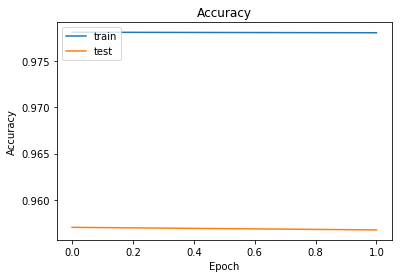

28860/28860 [==============================] - 0s 10us/step
0.31230550165277177 0.9564449064531677
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 10s 47us/step - loss: 0.0528 - acc: 0.9784 - val_loss: 0.3025 - val_acc: 0.9573

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 9s 46us/step - loss: 0.0534 - acc: 0.9780 - val_loss: 0.2986 - val_acc: 0.9574

Epoch 00002: val_acc did not improve from 0.95807


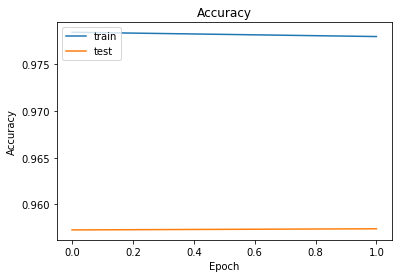

28860/28860 [==============================] - 0s 10us/step
0.312229522176691 0.9568607068689681
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 11s 54us/step - loss: 0.0533 - acc: 0.9786 - val_loss: 0.3017 - val_acc: 0.9569

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 11s 53us/step - loss: 0.0530 - acc: 0.9781 - val_loss: 0.3003 - val_acc: 0.9573

Epoch 00002: val_acc did not improve from 0.95807


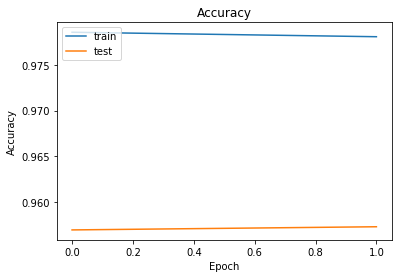

28860/28860 [==============================] - 0s 10us/step
0.3134350965544323 0.9564449064531677
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 11s 53us/step - loss: 0.0536 - acc: 0.9781 - val_loss: 0.3021 - val_acc: 0.9569

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 10s 48us/step - loss: 0.0532 - acc: 0.9784 - val_loss: 0.2982 - val_acc: 0.9573

Epoch 00002: val_acc did not improve from 0.95807


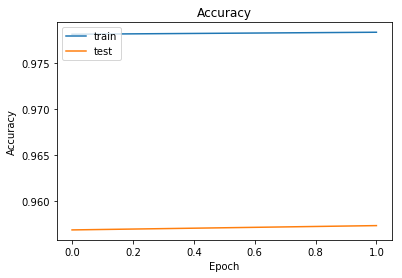

28860/28860 [==============================] - 0s 11us/step
0.3115142897215471 0.9566874567287628
Train on 202027 samples, validate on 57722 samples
Epoch 1/10
202027/202027 [==============================] - 10s 51us/step - loss: 0.0541 - acc: 0.9776 - val_loss: 0.3024 - val_acc: 0.9572

Epoch 00001: val_acc did not improve from 0.95807
Epoch 2/10
202027/202027 [==============================] - 10s 50us/step - loss: 0.0529 - acc: 0.9789 - val_loss: 0.3021 - val_acc: 0.9568

Epoch 00002: val_acc did not improve from 0.95807


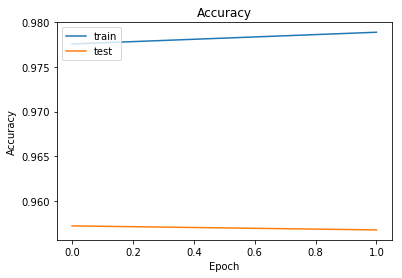

28860/28860 [==============================] - 0s 12us/step
0.31551130658127907 0.9556826056908669


In [61]:
for i in range(10):
    history = model.fit(np.array(train_data['X']), np.array(train_data['Y']),
                        epochs=epoch, batch_size=batch_size, verbose=1, callbacks=callbacks,
                        validation_data=(np.array(v_data['X']), np.array(v_data['Y'])))
    plt.plot(history.history["acc"])
    plt.plot(history.history["val_acc"])
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "test"],loc="upper left")
    plt.show()
    score, acc = model.evaluate(np.array(test_data['X']), np.array(test_data['Y']), batch_size=batch_size)
    print(score, acc)

# Testfor regularizer

In [3]:
import pytest

from keras.models import Sequential, Model
from keras.layers import Dense, Input, Average
from keras.utils import np_utils
from keras.utils import test_utils
from keras import regularizers
from keras import backend as K

data_dim = 5
num_classes = 2
batch_size = 10


def get_data():
    (x_train, y_train), _ = test_utils.get_test_data(
        num_train=batch_size,
        num_test=batch_size,
        input_shape=(data_dim,),
        classification=True,
        num_classes=num_classes)
    y_train = np_utils.to_categorical(y_train, num_classes)

    return x_train, y_train


def create_model(kernel_regularizer=None, activity_regularizer=None):
    model = Sequential()
    model.add(Dense(num_classes,
                    kernel_regularizer=kernel_regularizer,
                    activity_regularizer=activity_regularizer,
                    input_shape=(data_dim,)))
    return model


def create_multi_input_model_from(layer1, layer2):
    input_1 = Input(shape=(data_dim,))
    input_2 = Input(shape=(data_dim,))
    out1 = layer1(input_1)
    out2 = layer2(input_2)
    out = Average()([out1, out2])
    model = Model([input_1, input_2], out)
    model.add_loss(K.mean(out2))
    model.add_loss(1)
    model.add_loss(1)
    return model

In [9]:
def test_kernel_regularization():
    x_train, y_train = get_data()
    for reg in [regularizers.l1(),
                regularizers.l2(),
                regularizers.l1_l2()]:
        model = create_model(kernel_regularizer=reg)
        model.compile(loss='categorical_crossentropy', optimizer='sgd')
        assert len(model.losses) == 1
        print(model.train_on_batch(x_train, y_train))
        
test_kernel_regularization()

3.8568652
3.912843
7.20137


In [7]:
def test_activity_regularization():
    x_train, y_train = get_data()
    for reg in [regularizers.l1(), regularizers.l2()]:
        model = create_model(activity_regularizer=reg)
        model.compile(loss='categorical_crossentropy', optimizer='sgd')
        assert len(model.losses) == 1
        model.train_on_batch(x_train, y_train)


def test_regularization_shared_layer():
    dense_layer = Dense(num_classes,
                        kernel_regularizer=regularizers.l1(),
                        activity_regularizer=regularizers.l1())

    model = create_multi_input_model_from(dense_layer, dense_layer)
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    assert len(model.losses) == 6


def test_regularization_shared_model():
    dense_layer = Dense(num_classes,
                        kernel_regularizer=regularizers.l1(),
                        activity_regularizer=regularizers.l1())

    input_tensor = Input(shape=(data_dim,))
    dummy_model = Model(input_tensor, dense_layer(input_tensor))

    model = create_multi_input_model_from(dummy_model, dummy_model)
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    assert len(model.losses) == 6


def test_regularization_shared_layer_in_different_models():
    shared_dense = Dense(num_classes,
                         kernel_regularizer=regularizers.l1(),
                         activity_regularizer=regularizers.l1())
    models = []
    for _ in range(2):
        input_tensor = Input(shape=(data_dim,))
        unshared_dense = Dense(num_classes, kernel_regularizer=regularizers.l1())
        out = unshared_dense(shared_dense(input_tensor))
        models.append(Model(input_tensor, out))

    model = create_multi_input_model_from(*models)
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    assert len(model.losses) == 8